# Forest and Fire Data 1: Forest and Fire Data Merging/Interpolation
## Overview of Notebook
This notebook takes the compiled Ontario Forest Data within the Ontario boundary, and outputs a final dataframe that is modified to make better used of the data in the dataframe.

## 1) Import Modules and Packages

In [3]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import itertools

## 2) Get Path and Data
Here we will open both the Ontario Forest Data DataFrame and the Ontario Boundary shapfile. The latter will be used as a visual tool for plotting when needed.

In [4]:
path = r"I:\CME538 Project\CME538 Project\processed data ontario only\250m"

In [5]:
os.listdir(path)

['ONage2001_250m',
 'ONage2001_250m.tif',
 'ONage2001_250m.tif.aux.xml',
 'ONage2011_250m',
 'ONage2011_250m.tif',
 'ONage2011_250m.tif.aux.xml',
 'Onage2019_250m',
 'Onage2019_250m.tif',
 'Onage2019_250m.tif.aux.xml',
 'ONharvest1985_2020_250m',
 'ONharvest1985_2020_250m.tif',
 'ONharvest1985_2020_250m.tif.aux.xml',
 'Ontario_fire_in_forest_coordinates.csv.gz',
 'Ontario_Forest_Data.csv.gz',
 'Ontario_Forest_Data_Points.csv.gz',
 'ONvol2001_250m',
 'ONvol2001_250m.tif',
 'ONvol2001_250m.tif.aux.xml',
 'ONvol2011_250m',
 'ONvol2011_250m.tif',
 'ONvol2011_250m.tif.aux.xml',
 'ONvol2015_250m',
 'ONvol2015_250m.tif',
 'ONvol2015_250m.tif.aux.xml',
 'ON_forest_and_fires.csv.gz']

In [12]:
filenames = os.listdir(path)[12:15]
filenames

['Ontario_fire_in_forest_coordinates.csv.gz',
 'Ontario_Forest_Data.csv.gz',
 'Ontario_Forest_Data_Points.csv.gz']

In [13]:
ON_boundary = gpd.read_file(r"I:\CME538 Project\CME538 Project\ontario boundary\Province\Province.shp")

In [14]:
ON_boundary = ON_boundary.to_crs(4269)

<Axes: >

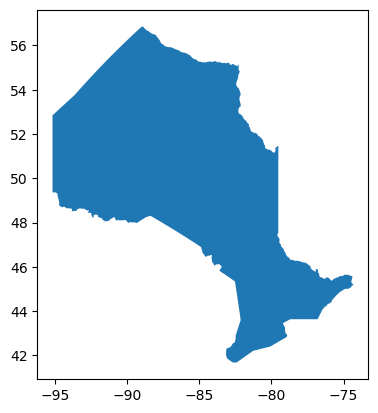

In [15]:
ON_boundary.plot()

In [16]:
ON_forest = pd.read_csv(path+"\\"+filenames[2],compression='gzip',index_col=0)
ON_forest.head()

,age_2001,age_2011,age_2019,year_harvested,vol_2001,vol_2011,vol_2015,lon,lat,geometry,lon1,lon2,lon3,lon4,lat1,lat2,lat3,lat4
0,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.890501,46.906052,POLYGON ((-84.88863710751139 46.90697579711416...,-84.888637,-84.889152,-84.892364,-84.891849,-84.888637,-84.889152,-84.892364,-84.891849
1,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.885743,46.912303,POLYGON ((-84.88387922029249 46.91322718112671...,-84.883879,-84.884394,-84.887607,-84.887092,-84.883879,-84.884394,-84.887607,-84.887092
2,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.887410,46.919261,POLYGON ((-84.88554623463179 46.92018483757417...,-84.885546,-84.886062,-84.889275,-84.888759,-84.885546,-84.886062,-84.889275,-84.888759
3,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.884197,46.918908,POLYGON ((-84.88233307531861 46.91983171613633...,-84.882333,-84.882849,-84.886062,-84.885546,-84.882333,-84.882849,-84.886062,-84.885546
4,57.0,NaN,NaN,NaN,38.69,NaN,NaN,-84.748565,46.962634,POLYGON ((-84.74669588337325 46.96355596569322...,-84.746696,-84.747219,-84.750434,-84.749911,-84.746696,-84.747219,-84.750434,-84.749911


In [17]:
ON_forest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15123785 entries, 0 to 15123784
Data columns (total 18 columns):
 #   Column          Dtype  
---  ------          -----  
 0   age_2001        float64
 1   age_2011        float64
 2   age_2019        float64
 3   year_harvested  float64
 4   vol_2001        float64
 5   vol_2011        float64
 6   vol_2015        float64
 7   lon             float64
 8   lat             float64
 9   geometry        object 
 10  lon1            float64
 11  lon2            float64
 12  lon3            float64
 13  lon4            float64
 14  lat1            float64
 15  lat2            float64
 16  lat3            float64
 17  lat4            float64
dtypes: float64(17), object(1)
memory usage: 2.1+ GB


We can acually drop the lat and lon columns for the poly shape (the last 8 columns) 

In [ ]:
ON_forest.drop(columns=['lon1','lon2','lon3','lon4','lat1','lat2','lat3','lat4'],inplace=True)

In [ ]:
ON_fire = pd.read_csv(path+"\\"+filenames[0],index_col=0)
ON_fire.head()

In [73]:
ON_fire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563882 entries, 232 to 15091524
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                563882 non-null  int64  
 1   SRC_AGENCY           563882 non-null  object 
 2   FIRE_ID              563882 non-null  object 
 3   FIRENAME             2139 non-null    object 
 4   LATITUDE             563882 non-null  float64
 5   LONGITUDE            563882 non-null  float64
 6   YEAR                 563882 non-null  int64  
 7   MONTH                563882 non-null  int64  
 8   DAY                  563882 non-null  int64  
 9   REP_DATE             563781 non-null  object 
 10  ATTK_DATE            49888 non-null   object 
 11  OUT_DATE             563814 non-null  object 
 12  DECADE               563882 non-null  object 
 13  SIZE_HA              563882 non-null  float64
 14  CAUSE                563882 non-null  object 
 15  PROTZONE          

## 3) Exploring and Modifying the Fire Data 

The ON_fire dataframe consists of fire data that were spatially joined to our current forest pixel grid. This one done sjoinging the forest data onto the fire data. A buffer polygon was created based on the area of the fire, centered at its cendroid. Then the joinging was done to see how many of our 250mx250m pixels coordinates intersected with the fire area polygon. We can now map the fires based on there areas on our coordinate grid. 

So the important geometry to keep for the ON_fire data is the last geometry column, which is the same grid as our fores data.

In [74]:
ON_fire.columns

Index(['index', 'SRC_AGENCY', 'FIRE_ID', 'FIRENAME', 'LATITUDE', 'LONGITUDE',
       'YEAR', 'MONTH', 'DAY', 'REP_DATE', 'ATTK_DATE', 'OUT_DATE', 'DECADE',
       'SIZE_HA', 'CAUSE', 'PROTZONE', 'FIRE_TYPE', 'MORE_INFO', 'CFS_REF_ID',
       'CFS_NOTE1', 'CFS_NOTE2', 'ACQ_DATE', 'SRC_AGY2', 'ECOZONE', 'ECOZ_REF',
       'ECOZ_NAME', 'ECOZ_NOM', 'point_geometry', 'area_sqm', 'buffer_radius',
       'buffer_geometry', 'pixel_geometry', 'area_intersect',
       'area_intersect_perc'],
      dtype='object')

We can get rid of some columns that we may not need like:
- Unamed: 0
- point_geometry
- buffer_geometry
- buffer_radius
- index_right

In [75]:
ON_fire.drop(columns=['point_geometry', 'buffer_radius', 'buffer_geometry'],inplace=True)

Let rename the lat,lon, LATITUDE and LONGITUDE columns to something better, and uncapitalize all the columns

In [76]:
ON_fire.rename(columns={"LATITUDE":'original_lat',"LONGITUDE":'original_lon'},inplace=True)
ON_fire.columns = ON_fire.columns.str.lower()
ON_fire.head()

,index,src_agency,fire_id,firename,original_lat,original_lon,year,month,day,rep_date,...,acq_date,src_agy2,ecozone,ecoz_ref,ecoz_name,ecoz_nom,area_sqm,pixel_geometry,area_intersect,area_intersect_perc
index_right,,,,,,,,,,,,,,,,,,,,,
232,9490,ON,SAU4,NaN,47.013000,-84.775200,2010,4,1,2010-04-01,...,2020-04-03,ON,6,6b,Boreal Shield East,Bouclier bordal,5000.0,"POLYGON ((6742553.429325026 1237567.62007252, ...",4991.971965,0.079872
1222,19897,ON,WAW14,NaN,48.301409,-86.152606,2021,7,20,2021-07-20,...,2022-04-11,ON,6,6b,Boreal Shield East,Bouclier bordal,2000.0,POLYGON ((6624707.836761105 1370531.8213195344...,368.653991,0.005898
1224,19897,ON,WAW14,NaN,48.301409,-86.152606,2021,7,20,2021-07-20,...,2022-04-11,ON,6,6b,Boreal Shield East,Bouclier bordal,2000.0,POLYGON ((6624695.5263683535 1370282.124595029...,1628.134795,0.026050
3409,8574,ON,WAW42,NaN,47.753600,-85.887200,2006,7,22,2006-07-22,...,2020-04-03,ON,6,6b,Boreal Shield East,Bouclier bordal,5000.0,"POLYGON ((6650067.555512638 1311211.10685281, ...",2991.405964,0.047862
3412,8574,ON,WAW42,NaN,47.753600,-85.887200,2006,7,22,2006-07-22,...,2020-04-03,ON,6,6b,Boreal Shield East,Bouclier bordal,5000.0,POLYGON ((6650079.865905387 1311460.8035773216...,2000.566001,0.032009


## 4) Merging Forest and Fire DataSets

Now we have two data sets:
1) ON_forest, crs = 4269
2) ON_fire, crs = 3347

We want to merge the fire data to the forest data. But first, we need to do some manipulation on the fire data. The column 'index' has a unique number associated with each fire, so we can check how many fires there are

In [77]:
print("There are {} unique fires".format(ON_fire['index'].nunique()))
print("But there are {} row in the ON_fire data".format(len(ON_fire)))

There are 20595 unique fires
But there are 563882 row in the ON_fire data


This checks out, there were 20866 fire in our original datasets and we have 20595. We have lost a few fires because some may have been errors or on lake or boundary edges. But there are over 500000 rows in our dataset! that is because some fire cover many 250mx250m pixel. We are not worried about duplication here because out grid matched our forest grid.

We are however interested in any data that has duplicate fires that happened in the same year or different years at the same location. Lets filter the dataframe to see how this looks.

In [78]:
ON_fire[ON_fire.duplicated('pixel_geometry',keep=False)]

,index,src_agency,fire_id,firename,original_lat,original_lon,year,month,day,rep_date,...,acq_date,src_agy2,ecozone,ecoz_ref,ecoz_name,ecoz_nom,area_sqm,pixel_geometry,area_intersect,area_intersect_perc
index_right,,,,,,,,,,,,,,,,,,,,,
96800,12520,ON,WAW102,NaN,48.6023,-86.0166,2001,8,13,2001-08-13,...,2020-04-03,ON,6,6b,Boreal Shield East,Bouclier bordal,1000.000015,"POLYGON ((6631650.302175253 1404731.451053986,...",998.394408,0.015974
96800,12914,ON,WAW30,NaN,48.6023,-86.0166,2001,7,31,2001-07-31,...,2020-04-03,ON,6,6b,Boreal Shield East,Bouclier bordal,1000.000015,"POLYGON ((6631650.302175253 1404731.451053986,...",998.394408,0.015974
98679,8302,ON,WAW22,NaN,48.6787,-85.9790,2011,7,25,2011-07-25,...,2020-04-03,ON,6,6b,Boreal Shield East,Bouclier bordal,2000.000030,POLYGON ((6633579.346268545 1413396.9740552895...,1996.788816,0.031949
98679,17449,ON,WAW27,NaN,48.6778,-85.9818,2016,8,2,2016-08-02,...,2020-04-03,ON,6,6b,Boreal Shield East,Bouclier bordal,1000.000015,POLYGON ((6633579.346268545 1413396.9740552895...,48.994121,0.000784
108515,8320,ON,WAW4,NaN,48.6911,-85.6357,2007,4,25,2007-04-25,...,2020-04-03,ON,6,6b,Boreal Shield East,Bouclier bordal,5000.000000,"POLYGON ((6658795.226574404 1417159.869270488,...",4170.266957,0.066724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14915499,18893,ON,PEM1,NaN,45.2244,-76.8328,2015,8,20,2015-08-20,...,2020-04-03,ON,6,6b,Boreal Shield East,Bouclier bordal,1000.000015,"POLYGON ((7389133.977868572 1147119.254995384,...",998.394408,0.015974
14940884,6366,ON,KEM1,NaN,45.2618,-76.4912,2005,5,12,2005-05-12,...,2020-04-03,ON,6,6b,Boreal Shield East,Bouclier bordal,5000.000000,POLYGON ((7414444.852446917 1157885.9688895727...,3519.858334,0.056318
14940884,6369,ON,KEM4,NaN,45.2627,-76.4912,2005,8,4,2005-08-04,...,2020-04-03,ON,6,6b,Boreal Shield East,Bouclier bordal,4000.000060,POLYGON ((7414444.852446917 1157885.9688895727...,3993.577632,0.063897


Here we can see that we have ducplicate columns, because multiple fires were reported arround this coordinate. For example, the first two rows (index = 96800) had a fire reported late july and early augus. 

Another case (index= 98679) show a fire in 2011 and 2016. 

For simplicity, if there are two fires reported in the same year, we will assume that only one occured. 

If there are multiple fires reported for different years, we need to figure out a way to deal with this.

Let filter out all the unnessecarry information at this stage. We are only interested about the date of the fire and the locaiton (geometry)

In [80]:
#ON_fire.rename(columns={'pixel_geometry':'geometry'},inplace=True)
ON_fire = ON_fire[['year','month','day','area_intersect_perc']]
ON_fire.head()

,year,month,day,area_intersect_perc
index_right,,,,
232,2010,4,1,0.079872
1222,2021,7,20,0.005898
1224,2021,7,20,0.026050
3409,2006,7,22,0.047862
3412,2006,7,22,0.032009


Now lets create a funciton that will return an array of dates for each coordinates that can have multiple fires reported

In [81]:
unique_index_duplicate = ON_fire.index.unique()
year = []
month = []
day = []
area_perc = []

def get_duplicate_fire_dates(data):
    """
    """
    year,month,day,area= [],[],[],[]
    if isinstance(data,pd.Series) == True:
        year.append(int(data[0]))
        month.append(int(data[1]))
        day.append((data[2]))
        area.append((data[3]))
    
    else:
        for i in range(len(data)):
            year.append((data.iloc[i,0]))
            month.append((data.iloc[i,1]))
            day.append((data.iloc[i,2]))
            area.append((data.iloc[i,3]))
        
    return year,month,day,area

for ind in unique_index_duplicate:
    
    year_temp,month_temp,day_temp,area_temp= get_duplicate_fire_dates(ON_fire.loc[ind][:])
    
    year.append(year_temp)
    month.append(month_temp)
    day.append(day_temp)
    area_perc.append(area_temp)

Check that our returned arrays are same length as the number of unique rows in ON_fire

In [82]:
print("length of year: {} month: {} day: {} and area: {} match the number of unique rows in ON_fire: {}".format(len(year),len(month),len(day),len(area_perc),len(ON_fire.index.unique())))

length of year: 524477 month: 524477 day: 524477 and area: 524477 match the number of unique rows in ON_fire: 524477


Now lets filter the ON_fire data to the just the unique rows and replace the year month and day columns with our arrays

In [83]:
ON_fire=ON_fire[~ON_fire.index.duplicated()]
ON_fire.year = year
ON_fire.month = month
ON_fire.day = day
ON_fire.area_intersect_perc = area_perc
ON_fire

,year,month,day,area_intersect_perc
index_right,,,,
232,[2010.0],[4.0],[1.0],[0.0798715514424094]
1222,[2021.0],[7.0],[20.0],[0.0058984638569503]
1224,[2021.0],[7.0],[20.0],[0.0260501567222071]
3409,[2006.0],[7.0],[22.0],[0.0478624954220104]
3412,[2006.0],[7.0],[22.0],[0.032009056019226]
...,...,...,...,...
15091520,[2001.0],[7.0],[25.0],[0.0897901610678765]
15091521,[2001.0],[7.0],[25.0],[0.9524306336683118]
15091522,[2001.0],[7.0],[25.0],[0.5633491926305579]


No we can join the ON_fire to the ON_forest data frame on the index, which is a unique code for each pixel. Lets create a new dataframe called ON_forest_and_fires

In [84]:
ON_forest_and_fires = ON_forest.join(ON_fire,lsuffix=" ")

In [85]:
ON_forest_and_fires.head()

,age_2001,age_2011,age_2019,year_harvested,vol_2001,vol_2011,vol_2015,lon,lat,geometry,year,month,day,area_intersect_perc
0,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.890501,46.906052,POLYGON ((-84.88863710751139 46.90697579711416...,NaN,NaN,NaN,NaN
1,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.885743,46.912303,POLYGON ((-84.88387922029249 46.91322718112671...,NaN,NaN,NaN,NaN
2,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.887410,46.919261,POLYGON ((-84.88554623463179 46.92018483757417...,NaN,NaN,NaN,NaN
3,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.884197,46.918908,POLYGON ((-84.88233307531861 46.91983171613633...,NaN,NaN,NaN,NaN
4,57.0,NaN,NaN,NaN,38.69,NaN,NaN,-84.748565,46.962634,POLYGON ((-84.74669588337325 46.96355596569322...,NaN,NaN,NaN,NaN


lets take a look and see how non nan rows look

In [86]:
ON_forest_and_fires[~ON_forest_and_fires.year.isna()]

,age_2001,age_2011,age_2019,year_harvested,vol_2001,vol_2011,vol_2015,lon,lat,geometry,year,month,day,area_intersect_perc
232,87.0,86.0,NaN,NaN,117.97,117.80,NaN,-84.776202,47.013155,"POLYGON ((-84.77433143745627 47.014077164415, ...",[2010.0],[4.0],[1.0],[0.0798715514424094]
1222,81.0,93.0,36.0,NaN,147.90,165.82,95.8,-86.151748,48.302579,POLYGON ((-86.14985094591961 48.30353421454981...,[2021.0],[7.0],[20.0],[0.0058984638569503]
1224,94.0,99.0,40.0,NaN,165.28,166.44,127.8,-86.152214,48.300359,POLYGON ((-86.15031701003014 48.30131379534876...,[2021.0],[7.0],[20.0],[0.0260501567222071]
3409,84.0,100.0,65.0,NaN,181.62,203.73,181.7,-85.887214,47.752528,POLYGON ((-85.88533533968037 47.75347499764247...,[2006.0],[7.0],[22.0],[0.0478624954220104]
3412,65.0,103.0,65.0,NaN,142.26,223.48,65.2,-85.886740,47.754742,"POLYGON ((-85.8848615379669 47.75568934376854,...",[2006.0],[7.0],[22.0],[0.032009056019226]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15091520,18.0,NaN,NaN,NaN,9.07,0.02,NaN,-74.970468,45.121490,POLYGON ((-74.96849847300699 45.12219922775676...,[2001.0],[7.0],[25.0],[0.0897901610678765]
15091521,2.0,43.0,NaN,NaN,1.31,16.24,NaN,-74.969500,45.123594,POLYGON ((-74.96753051288393 45.12430269376673...,[2001.0],[7.0],[25.0],[0.9524306336683118]
15091522,53.0,56.0,NaN,NaN,44.64,98.80,NaN,-74.968532,45.125697,POLYGON ((-74.9665624623231 45.126406169529716...,[2001.0],[7.0],[25.0],[0.5633491926305579]
15091523,59.0,51.0,NaN,NaN,80.28,85.03,NaN,-74.971504,45.126382,POLYGON ((-74.96953389447624 45.12709144814664...,[2001.0],[7.0],[25.0],[0.0040230257997567]


We can also take a look at the rows which have multiple fires lets add a column called number_fires

In [87]:
ON_forest_and_fires['number_fires'] = ON_forest_and_fires[~ON_forest_and_fires.year.isna()].year.apply(lambda row: len(row))

Lets also see what the max number of fires is and lets see what having more then 10 fires on a pixel looks like

In [312]:
ON_forest_and_fires.number_fires.unique()

array([nan,  1.,  2.,  3.,  4.,  6.,  5., 11., 10.,  7.,  8.,  9., 13.,
       16., 12.])

In [313]:
ON_forest_and_fires[ON_forest_and_fires.number_fires > 10]

,age_2001,age_2011,age_2019,year_harvested,vol_2001,vol_2011,vol_2015,lon,lat,geometry,year,month,day,area_intersect_perc,number_fires
510800,73.0,48.0,NaN,NaN,116.84,98.49,NaN,-89.261194,48.349536,POLYGON ((-89.25936661759084 48.35055212937501...,"[2003, 2004, 2005, 2004, 2006, 2010, 2012, 201...","[2, 5, 4, 4, 4, 4, 9, 8, 8, 4, 4]","[5, 3, 12, 15, 5, 10, 18, 12, 1, 2, 23]","[0.0159743105264336, 0.0159743105264336, 0.124...",11.0
2543437,105.0,112.0,NaN,NaN,47.55,36.79,NaN,-90.231395,51.226783,"POLYGON ((-90.2294609558206 51.22782789303231,...","[2003, 2009, 2007, 2011, 2011, 2010, 2010, 200...","[5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5]","[5, 10, 9, 15, 16, 25, 28, 20, 20, 11, 14, 20,...","[0.0791024721464891, 0.1300926315067332, 0.015...",13.0
2543438,112.0,101.0,48.0,NaN,69.46,48.20,167.5,-90.227797,51.226614,POLYGON ((-90.22586318985228 51.22765808479918...,"[2003, 2005, 2005, 2006, 2007, 2008, 2007, 200...","[5, 4, 5, 8, 4, 6, 5, 5, 5, 5, 5, 4, 4, 5, 4, 5]","[5, 20, 6, 28, 25, 4, 4, 10, 11, 15, 16, 13, 2...","[0.0007690792960745, 0.0319486210531279, 0.015...",16.0
2543554,59.0,68.0,151.0,2000.0,31.25,31.06,60.1,-90.230854,51.231301,POLYGON ((-90.22892020435611 51.23234587617902...,"[2004, 2005, 2005, 2009, 2010, 2011, 2012, 201...","[5, 5, 5, 5, 4, 6, 4, 4, 4, 4, 7]","[23, 6, 20, 5, 21, 16, 28, 22, 13, 29, 23]","[0.0101751777477629, 0.0098495400463428, 0.076...",11.0
2543555,14.0,92.0,NaN,2000.0,17.15,68.60,NaN,-90.231125,51.229042,"POLYGON ((-90.2291905953826 51.23008687681379,...","[2005, 2009, 2009, 2011, 2011, 2010, 2010, 201...","[5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5]","[20, 5, 10, 14, 16, 13, 27, 28, 22, 1, 19]","[0.009252297225248, 0.0002755162747472, 0.0190...",11.0
3231662,98.0,107.0,52.0,NaN,75.42,36.22,87.0,-93.994880,51.812582,"POLYGON ((-93.99302080199416 51.8136986428253,...","[2004, 2006, 2006, 2006, 2006, 2006, 2010, 201...","[5, 4, 7, 8, 9, 9, 5, 5, 5, 5, 5, 7]","[31, 25, 10, 11, 9, 10, 10, 13, 13, 21, 19, 7]","[0.0159743105265888, 0.0638972421065737, 0.015...",12.0


In [88]:
ON_forest_and_fires.head()

,age_2001,age_2011,age_2019,year_harvested,vol_2001,vol_2011,vol_2015,lon,lat,geometry,year,month,day,area_intersect_perc,number_fires
0,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.890501,46.906052,POLYGON ((-84.88863710751139 46.90697579711416...,NaN,NaN,NaN,NaN,NaN
1,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.885743,46.912303,POLYGON ((-84.88387922029249 46.91322718112671...,NaN,NaN,NaN,NaN,NaN
2,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.887410,46.919261,POLYGON ((-84.88554623463179 46.92018483757417...,NaN,NaN,NaN,NaN,NaN
3,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.884197,46.918908,POLYGON ((-84.88233307531861 46.91983171613633...,NaN,NaN,NaN,NaN,NaN
4,57.0,NaN,NaN,NaN,38.69,NaN,NaN,-84.748565,46.962634,POLYGON ((-84.74669588337325 46.96355596569322...,NaN,NaN,NaN,NaN,NaN


In [89]:
ON_forest_and_fires[(~ON_forest_and_fires.year.isna()) & (ON_forest_and_fires.number_fires > 1)].head()

,age_2001,age_2011,age_2019,year_harvested,vol_2001,vol_2011,vol_2015,lon,lat,geometry,year,month,day,area_intersect_perc,number_fires
96800,84.0,82.0,37.0,NaN,104.70,170.61,125.9,-86.016598,48.602547,POLYGON ((-86.01468481447249 48.60350038057078...,"[2001, 2001]","[8, 7]","[13, 31]","[0.0159743105265227, 0.0159743105265227]",2.0
98679,87.0,78.0,64.0,NaN,197.53,101.76,NaN,-85.979753,48.678436,POLYGON ((-85.97783522787022 48.67938878672491...,"[2011, 2016]","[7, 8]","[25, 2]","[0.0319486210530767, 0.0007839059283847]",2.0
108515,57.0,57.0,103.0,NaN,88.01,88.01,173.3,-85.634417,48.690536,"POLYGON ((-85.632490369479 48.691481892466626,...","[2007, 2018]","[4, 5]","[25, 12]","[0.0667242713114235, 0.221123112538368]",2.0
108521,76.0,76.0,NaN,NaN,60.61,84.04,NaN,-85.623854,48.691768,POLYGON ((-85.62192771436844 48.69271393373703...,"[2009, 2019]","[6, 5]","[8, 11]","[0.0066296644271527, 0.041429601921837]",2.0
108524,95.0,73.0,64.0,NaN,61.79,64.73,179.4,-85.627209,48.692098,POLYGON ((-85.62528264154028 48.69304374218294...,"[2003, 2007, 2010]","[9, 4, 3]","[5, 25, 16]","[0.1723697363340366, 0.0159743105265517, 0.239...",3.0


Everything looks good. Lets go ahead and save it to our drive as a safekeep.

In [92]:
ON_forest_and_fires.to_csv(path+"\\"+"ON_forest_and_fires.csv.gz",compression='gzip',header=ON_forest_and_fires.columns)

## 5) Exploring the Data
Lets take a look at some of the columns. We have two main categories, aside from the harvest years columns; (1) the age of forests and (2) the volume density of forests in Ontario. For each catergory, we have three points in time. 

Lets take a look at how this data looks. To make visualization easier, lets only look that the rows without nan value.

### 5 alternate) Only do cell 179 to 181 if you need to re-import the data

In [6]:
ON_forest_and_fires = pd.read_csv(path+"\\"+"ON_forest_and_fires.csv.gz",compression='gzip',index_col=0)
ON_forest_and_fires.head()

C:\Users\Antoine Pepin\AppData\Local\Temp\ipykernel_14804\841440765.py:1: DtypeWarning: Columns (11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  ON_forest_and_fires = pd.read_csv(path+"\\"+"ON_forest_and_fires.csv.gz",compression='gzip',index_col=0)


,age_2001,age_2011,age_2019,year_harvested,vol_2001,vol_2011,vol_2015,lon,lat,geometry,year,month,day,area_intersect_perc,number_fires
0,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.890501,46.906052,POLYGON ((-84.88863710751139 46.90697579711416...,NaN,NaN,NaN,NaN,NaN
1,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.885743,46.912303,POLYGON ((-84.88387922029249 46.91322718112671...,NaN,NaN,NaN,NaN,NaN
2,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.887410,46.919261,POLYGON ((-84.88554623463179 46.92018483757417...,NaN,NaN,NaN,NaN,NaN
3,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.884197,46.918908,POLYGON ((-84.88233307531861 46.91983171613633...,NaN,NaN,NaN,NaN,NaN
4,57.0,NaN,NaN,NaN,38.69,NaN,NaN,-84.748565,46.962634,POLYGON ((-84.74669588337325 46.96355596569322...,NaN,NaN,NaN,NaN,NaN


In [7]:
ON_forest_and_fires['year']=ON_forest_and_fires.year.str.strip("][")
ON_forest_and_fires['year']=ON_forest_and_fires.year.str.split(", ")
ON_forest_and_fires['month']=ON_forest_and_fires.month.str.strip("][")
ON_forest_and_fires['month']=ON_forest_and_fires.month.str.split(", ")
ON_forest_and_fires['day']=ON_forest_and_fires.day.str.strip("][")
ON_forest_and_fires['day']=ON_forest_and_fires.day.str.split(", ")
ON_forest_and_fires['area_intersect_perc']=ON_forest_and_fires.area_intersect_perc.str.strip("][")
ON_forest_and_fires['area_intersect_perc']=ON_forest_and_fires.area_intersect_perc.str.split(", ")
ON_forest_and_fires.head()

,age_2001,age_2011,age_2019,year_harvested,vol_2001,vol_2011,vol_2015,lon,lat,geometry,year,month,day,area_intersect_perc,number_fires
0,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.890501,46.906052,POLYGON ((-84.88863710751139 46.90697579711416...,NaN,NaN,NaN,NaN,NaN
1,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.885743,46.912303,POLYGON ((-84.88387922029249 46.91322718112671...,NaN,NaN,NaN,NaN,NaN
2,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.887410,46.919261,POLYGON ((-84.88554623463179 46.92018483757417...,NaN,NaN,NaN,NaN,NaN
3,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.884197,46.918908,POLYGON ((-84.88233307531861 46.91983171613633...,NaN,NaN,NaN,NaN,NaN
4,57.0,NaN,NaN,NaN,38.69,NaN,NaN,-84.748565,46.962634,POLYGON ((-84.74669588337325 46.96355596569322...,NaN,NaN,NaN,NaN,NaN


In [8]:
ON_forest_and_fires.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15123785 entries, 0 to 15123784
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   age_2001             float64
 1   age_2011             float64
 2   age_2019             float64
 3   year_harvested       float64
 4   vol_2001             float64
 5   vol_2011             float64
 6   vol_2015             float64
 7   lon                  float64
 8   lat                  float64
 9   geometry             object 
 10  year                 object 
 11  month                object 
 12  day                  object 
 13  area_intersect_perc  object 
 14  number_fires         float64
dtypes: float64(10), object(5)
memory usage: 1.8+ GB


In [174]:
ON_forest_and_fires[~ON_forest_and_fires.isnull().any(axis=1)].head()

,age_2001,age_2011,age_2019,year_harvested,vol_2001,vol_2011,vol_2015,lon,lat,geometry,year,month,day,area_intersect_perc,number_fires
19896,78.0,39.0,19.0,2000.0,79.80,92.13,22.3,-85.380952,48.093603,POLYGON ((-85.37904735118187 48.09454110770255...,[2012.0],[7.0],[18.0],[0.0003853716855485],1.0
37433,58.0,15.0,16.0,2003.0,106.51,18.07,17.5,-84.848203,48.226017,POLYGON ((-84.84628034743098 48.22694487022099...,[2004.0],[6.0],[19.0],[0.1087929503554119],1.0
37443,91.0,27.0,47.0,2003.0,168.01,73.06,17.7,-84.851515,48.226373,POLYGON ((-84.84959228555931 48.22730110451564...,[2004.0],[6.0],[19.0],[0.0349758384347726],1.0
41341,32.0,25.0,18.0,2001.0,20.62,10.13,133.4,-84.930238,48.266584,POLYGON ((-84.92831500888651 48.26751368669805...,[2014.0],[8.0],[3.0],[0.0022646724981402],1.0
41775,70.0,64.0,17.0,2002.0,117.95,24.30,15.8,-84.959025,48.274188,POLYGON ((-84.95710307661832 48.27511836207139...,[2001.0],[8.0],[8.0],[0.0159743105264925],1.0


We can see that the data is not fool proof. For example, row 19896 has the following information:
- Age in 2001: 78.0
- Age in 2011: 39.0 
- Age in 2019: 19.0
- Year Harvested: 2000
- Vol in 2001: 79.8
- Vol in 2011: 92.13
- Vol in 2015: 22.3

There is also a fire that happened in 2012 that burned about 0.3 % of the coordinate geometry.

So, in general the data goes in the right direction, but it is not 100% accurate. If base everything from an age of 78 in 2011, then in 2011 the forest should be 88 years old, but the data says 39 years. Also, since it was harvested in 2000, then the age in 2019 should be 19, which is correct. But these two sets dont agree. Further, the volume should increase if not harvested, which it does from 2001 to 2011, but then decreases in 2015. Also, there was a partial fire in these coordinates in 2012.

So we cannot directly use each column for our analytics and modelling. Our goal is to generate an estimated age and volume for each year, weather or not the pixel was harvested, if there was a forest fire, etc. For that we need to interpolate bewteen the data we actually have

## 6) Manipulating the Data
That being said, based on some quick research the follwoing can be said about age and volume density:
- Age: age is linear, on a 1 to 1 slope, defined by the folowing equation: [Y = mx + b] where Y is the age, x is the year m is the slope of 1 and b is the y axis intercept (i.e age in 2001).
- Volume: volume/size/hieght to age relationships can be defined as sigmoidal, and can be grossly defined by the following equation:  [ln Y = a +  b x (1 / A)](https://fennerschool-associated.anu.edu.au/mensuration/BrackandWood1998/T_GROWTH.HTM#:~:text=Equations%20to%20predict%20size%2Fage,a%20and%20b%20denote%20coefficients.) where Y is a parameter of growth (dbh, height, volume), A is age and a and b denote coefficients.

We are goind to make the following assumtion while we interpolate the data:
- Age is one to one slope
- Volumne is sigmoidal distribution with ranges of coefficients specified as a>0 and b<0.
- When a coordinate is harvested, we will add a data point of that harvest year as the age being zero to compute the avearge age intercep term for linerization beyond that point
- When a fire occured on a coordinate, its age and volume will be reduced byt the percent of area that was burned. 

### Age Data Linear Interpolation

We need to come up with a way to calculate the average intercept based on a slope. This funciton can be used in the future to interpolate with the data. Here is an example of how it is built, followed by the function itself. 

In [9]:
x = np.array([2001,2011,2019])
x

array([2001, 2011, 2019])

In [10]:
y = np.array(ON_forest_and_fires.loc[1000][['age_2001','age_2011','age_2019']])
y

array([63.0, 85.0, 65.0], dtype=object)

We can compute the average intercep by getting the b intercept for each point and taking average, by fixing our slope to 1

In [11]:
b_array = (y-x)

In [12]:
np.mean(b_array)

-1939.3333333333333

Now, lets create a plot that contains the actual data and the interpolation

In [13]:
x_int = np.arange(2000,2025,1)
y_int = x_int + np.mean(b_array)

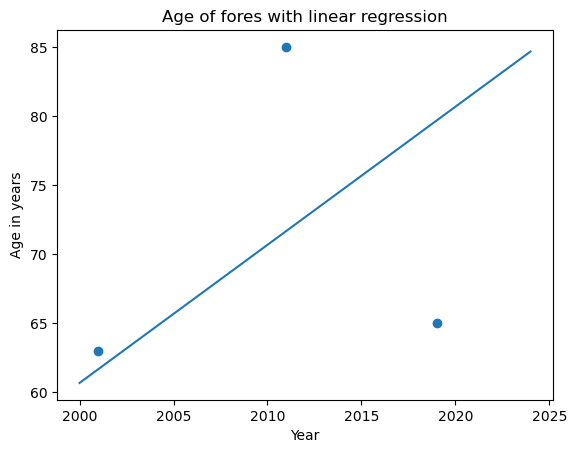

In [14]:
ax = plt.scatter(x,y)
plt.title("Age of fores with linear regression")
plt.xlabel('Year')
plt.ylabel('Age in years')
plt.plot(x_int,y_int)

Our pipeline is good. We can now build a function

In [15]:
def linear_reg_fixed_slope(x_list,y_list,m):
    """This funciton takes in two arrays x and y, and a fixed slope and calculates the intercep b that best fits the data.
    This funciton only workd for linear regression, that is y=mx+b. x and y must be 1D arrays with same length.
    Parameters: 
        x_list: np.array of fixed x values
        y_list: np.array of y data values
        m: slope of linear regression, fixed
    Output:
        b: best b intercept for the given data
    """
    #get the indexes of not nan values
    z = (y_list-x_list*m)
    b = np.nanmean(z)
    
    return b

### Volumn Data Sigmoidal Interpolation

As previously explained, volume to age relationships can be deinfed as sigmoidal, with the following equation: [ln(Y)=a+b*(1/A)] where Y is the volume, A is age and a and b are coefficients. Based on some research of volume to age plots of forests, the coefficient a has to be positive and the coeffocient b has to benegative in the range of about -5 to -15. This is a gross assumption at this stage to generate some usefull data.

In [16]:
y_vol = np.array(ON_forest_and_fires.loc[1000][['vol_2001','vol_2011','vol_2015']])
y_vol

array([124.06, 234.38, 95.8], dtype=object)

We will use our interpolated data to calucalte the age of these volumes

In [17]:
x_vol_age = np.array([2001,2011,2015])

Generate the x-axis age for the volume years

In [18]:
x_vol = x_vol_age + np.mean(b_array)
x_vol

array([61.66666667, 71.66666667, 75.66666667])

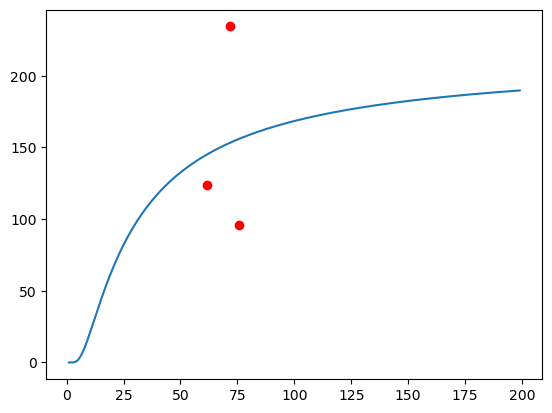

In [20]:
import math
from scipy.optimize import curve_fit
def volume_age(x,a,b):
    return np.exp(a+b/x)

popt, pcov=curve_fit(volume_age,x_vol, y_vol, method='dogbox')

x_vol_fit = np.arange(1,200,1)
y_vol_fit = volume_age(x_vol_fit,popt[0],popt[1])
plt.plot(x_vol_fit,y_vol_fit)
plt.scatter(x_vol,y_vol,color='red')

Now that we have our interpolation functions, we need to come up with a pipeline and some functions to go throught our data and generate the required information for each year. Lets remind oursleve of what our data looks like

In [38]:
ON_forest_and_fires.head()

,age_2001,age_2011,age_2019,year_harvested,vol_2001,vol_2011,vol_2015,lon,lat,geometry,year,month,day,area_intersect_perc,number_fires
0,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.890501,46.906052,POLYGON ((-84.88863710751139 46.90697579711416...,NaN,NaN,NaN,NaN,NaN
1,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.885743,46.912303,POLYGON ((-84.88387922029249 46.91322718112671...,NaN,NaN,NaN,NaN,NaN
2,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.887410,46.919261,POLYGON ((-84.88554623463179 46.92018483757417...,NaN,NaN,NaN,NaN,NaN
3,104.0,NaN,NaN,NaN,8.55,NaN,NaN,-84.884197,46.918908,POLYGON ((-84.88233307531861 46.91983171613633...,NaN,NaN,NaN,NaN,NaN
4,57.0,NaN,NaN,NaN,38.69,NaN,NaN,-84.748565,46.962634,POLYGON ((-84.74669588337325 46.96355596569322...,NaN,NaN,NaN,NaN,NaN


We want a dunction that will loop through each row, and get the relevant data and boundary/initial conditions for interpolation. To make things easier, lets build one that will get the initial conditions (harves, and fires), one that will get the information for age and one for volume.

   At the end, it would be ideal to have an array for each year that contains the age, volume, harvested or not, fire or not, and maybe percent burned to put in a  dataframe that looks like this, for each year

In [467]:
pd.DataFrame(columns=['age','vol','harvested','burned','percent burned'])

,age,vol,harvested,burned,percent burned


Then, we will be able to look at each year, do some EDA, visualization and some machine learning to predict if a certain coordinate is succestible to a forest fire or not

Lets get going with our pipeline. The function age_forest loops through evey line of data, and generates a years vs age array based on the fixed slope of 1, initial boundary conditions as assumed from disturbances (harvesiting, forest fires) 

In [48]:
temp = np.empty(21)
temp[:] = np.nan

In [49]:
temp

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])

In [85]:
def age_forest(data):
    """
    """
    
    m=1
    
    #Firts condition is if there are no fires and no harvest
    if (data.isna()['number_fires'] == True) & (data.isna()['year_harvested'] == True):
        set_years = np.array([2001,2011,2019])
        set_ages = np.array(data[['age_2001','age_2011','age_2019']])
        b = linear_reg_fixed_slope(set_years,set_ages,m)
        years = np.arange(2001,2021,1)
        if str(b) != 'nan':
            ages = (years*m+b).astype('int')
            harvested = np.zeros(20).astype('int')
            fires = np.zeros(20).astype('int')
            month = np.empty(21)
            month[:] = np.nan
            day = np.empty(21)
            day[:] = np.nan
            disturbance_weight = np.empty(21)
            disturbance_weight[:] = np.nan
            return ages,fires,harvested,disturbance_weight,month,day
        else:
            ages = np.empty(21)
            ages[:] = np.nan
            harvested = np.zeros(20).astype('int')
            fires = np.zeros(20).astype('int')
            month = np.empty(21)
            month[:] = np.nan
            day = np.empty(21)
            day[:] = np.nan
            disturbance_weight = np.empty(21)
            disturbance_weight[:] = np.nan
            return ages,fires,harvested,disturbance_weight,month,day
        
    #next condition is if it was not harvested, but fires occured
    elif data.isna()['number_fires'] == False:
        if data.isna()['year_harvested'] == True:
            disturbance_years= np.array(data['year'],dtype='float')
            disturbance_factors = np.array(data['area_intersect_perc'],dtype='float')
            
            disturbance_years, inv = np.unique(disturbance_years, return_inverse=True)      
            temp_df = np.zeros(len(disturbance_years), dtype=disturbance_factors.dtype)
            np.add.at(temp_df, inv, disturbance_factors)  
            disturbance_factors=temp_df
            
        else:
            
            disturbance_years= np.append(np.array(data['year'],dtype='float'),data['year_harvested'])
            disturbance_factors = np.append(np.array(data['area_intersect_perc'],dtype='float'),1.0)
            
            disturbance_years, inv = np.unique(disturbance_years, return_inverse=True)      
            temp_df = np.zeros(len(disturbance_years), dtype=disturbance_factors.dtype)
            np.add.at(temp_df, inv, disturbance_factors)  
            disturbance_factors=temp_df
            
            print(disturbance_years)
            print(disturbance_factors)

        #Create arrays of 1 and 0 for fires and harvest, and the month/day for the fire
        fires,harvested,month,disturbance_weight,day = [],[],[],[],[]
        j=0
        for i in range(2001,2022):
            if i in list(disturbance_years):
                if i == data['year_harvested']:
                    harvested.append(1)
                else:
                    fires.append(1)
                    month.append(data['month'])
                    day.append(data['day'])
                    disturbance_weight.append(disturbance_factors[j])
                    j = j+1
            else:
                fires.append(0)
                harvested.append(0)
                month.append(np.nan)
                day.append(np.nan)
                disturbance_weight.append(np.nan)
        year = 2001
        print("Starting new pixel at age {}".format(year))
        j=0
        for fire,area,i in zip(disturbance_years,disturbance_factors,range(len(disturbance_years))):
            print("abcdefg:",len(disturbance_years))
            print("year is currently {}".format(year))
            fire = float(fire)
            area = float(area)
            
            if area > 1:
                area = 1.0
            print("area of fire is:",area)
            print("year of distrubance is {} with {}% reductions".format(fire,area*100))
            print("we are on the {}th fire on this pixel out of {}".format(i+1,len(disturbance_years)))
            
                              
            
            if fire < 2001:
                print("Years are out of bounds")
                j=0
                continue
            elif (fire >= 2001) & (fire < 2011):
                if (i == 0) | (j==0):
                    set_years=np.array([2001])
                    set_ages=np.array(data['age_2001'])
                    b = linear_reg_fixed_slope(set_years,set_ages,m)
                    years = np.arange(year,fire,1)
                    ages = (years*m+b).astype('int')
                    year = fire
                    year_age = int((fire*m+b)*(1-area))
                    #print(year_age)
                    fire_prev = fire
                    j=1
                    continue
                else:
                    set_years=np.array([year])
                    set_ages=np.array([year_age])
                    b = linear_reg_fixed_slope(set_years,set_ages,m)
                    temp_years = np.arange(year,fire,1)
                    years = np.append(years,temp_years)
                    ages = np.append(ages,(temp_years*m+b).astype('int'))
                    year = fire
                    year_age = int((fire*m+b)*(1-area))
                    #print(year_age)
                    fire_prev = fire
                    j=1
                    continue
            
            elif (fire >= 2011) & (fire < 2019):
                if (i == 0) | (j==0):
                    set_years=np.array([2001,2011])
                    set_ages=np.array(data[['age_2001','age_2011']])
                    b = linear_reg_fixed_slope(set_years,set_ages,m)
                    years = np.arange(year,fire,1)
                    ages = (years*m+b).astype('int')
                    year = fire
                    year_age = int((fire*m+b)*(1-area))
                    #print(year_age)
                    fire_prev = fire
                    j=1
                    continue
                else:
                    set_years=np.array([year])
                    set_ages=np.array([year_age])
                    b = linear_reg_fixed_slope(set_years,set_ages,m)
                    temp_years = np.arange(year,fire,1)
                    years = np.append(years,temp_years)
                    ages = np.append(ages,(temp_years*m+b).astype('int'))
                    year = fire
                    year_age = int((fire*m+b)*(1-area))
                    #print(year_age)
                    fire_prev = fire
                    j=1
                    continue
                
            elif (fire >= 2019) & (fire <= 2021):
                if (i == 0) | (j==0):
                    set_years=np.array([2001,2011,2019])
                    set_ages=np.array(data[['age_2001','age_2011','age_2019']])
                    b = linear_reg_fixed_slope(set_years,set_ages,m)
                    years = np.arange(year,fire,1)
                    ages = (years*m+b).astype('int')
                    year = fire
                    year_age = int((fire*m+b)*(1-area))
                    #print(year_age)
                    fire_prev = fire
                    j=1
                    continue
                else:
                    set_years=np.array([year])
                    set_ages=np.array([year_age])
                    b = linear_reg_fixed_slope(set_years,set_ages,m)
                    temp_years = np.arange(year,fire,1)
                    years = np.append(years,temp_years)
                    ages = np.append(ages,(temp_years*m+b).astype('int'))
                    year = fire
                    year_age = int((fire*m+b)*(1-area))
                    print(year_age)
                    fire_prev = fire
                    j=1
                    continue
                

        if year < 2011:
            set_years=np.array([year,2011,2019])
            set_ages=np.append(year_age,np.array(data[['age_2011','age_2019']]))
            b = linear_reg_fixed_slope(set_years,set_ages,m)
            temp_years = np.arange(year,2022,1)
            years = np.append(years,temp_years)
            ages = np.append(ages,(temp_years*m+b).astype('int'))
        elif (year >= 2011) & (year < 2019):

            set_years=np.array([year,2019])
            set_ages=np.append(year_age,np.array(data[['age_2019']]))
            b = linear_reg_fixed_slope(set_years,set_ages,m)
            temp_years = np.arange(year,2022,1)
            years = np.append(years,temp_years)
            ages = np.append(ages,(temp_years*m+b).astype('int'))
        elif (year >= 2019) & (year <= 2021):

            set_years=np.array([year])
            set_ages=np.array(year_age)
            b = linear_reg_fixed_slope(set_years,set_ages,m)
            temp_years = np.arange(year,2022,1)
            years = np.append(years,temp_years)
            ages = np.append(ages,(temp_years*m+b).astype('int'))
        return ages,fires,harvested,disturbance_weight,month,day
            
    
    #last condition is if it was harvested, and fires occured
    #elif (data.isna()['number_fires'] == False) & (data.isna()['year_harvested'] == False):
    
    

In [86]:
ON_forest_and_fires[(ON_forest_and_fires.number_fires == 4) & (ON_forest_and_fires.year_harvested.isna() == False)].head(2)

,age_2001,age_2011,age_2019,year_harvested,vol_2001,vol_2011,vol_2015,lon,lat,geometry,year,month,day,area_intersect_perc,number_fires
2543463,65.0,68.0,19.0,2000.0,54.21,31.06,NaN,-90.210895,51.216727,POLYGON ((-90.2089608105546 51.217771609582485...,"[2011, 2012, 2012, 2013]","[5, 4, 4, 5]","[14, 26, 29, 19]","[0.0159743105266338, 0.0154610819730699, 0.047...",4.0
3231652,73.0,40.0,53.0,2019.0,23.17,24.60,86.8,-93.987617,51.810241,POLYGON ((-93.98575693786945 51.81135732193882...,"[2014, 2019, 2018, 2019]","[5, 6, 5, 5]","[24, 16, 7, 28]","[0.015974310526646, 0.015974310526646, 5.17430...",4.0


In [94]:
#data = pd.DataFrame(columns=['ages','harvested','fires'])

#data[['ages','harvested','fires']]=ON_forest_and_fires.head(10).apply(lambda row: age_forest(row),axis=1)

ages,fires,harvested,disturbance_weight,month,day = [],[],[],[],[],[]
data = ON_forest_and_fires[(ON_forest_and_fires.number_fires == 3) & (ON_forest_and_fires.year_harvested.isna() == False)].head(100000)
#data = ON_forest_and_fires.head()
print(data)
for i in range(len(data)):
    print("\n we are on data row",i)
    result = age_forest(data.iloc[i,:])
    ages.append(result[0])
    fires.append(result[1])
    harvested.append(result[2])
    disturbance_weight.append(result[3])
    month.append(result[4])
    day.append(result[5])
   


         age_2001  age_2011  age_2019  year_harvested  vol_2001  vol_2011  \
1307437      50.0      67.0       9.0          2010.0     87.55     53.81   
1307891      43.0      35.0       9.0          2010.0     96.96     49.84   

         vol_2015        lon        lat  \
1307437       NaN -94.931521  50.135740   
1307891       NaN -94.840093  50.167236   

                                                  geometry  \
1307437  POLYGON ((-94.92976358751798 50.13686713087475...   
1307891  POLYGON ((-94.83833156898562 50.1683619636662,...   

                       year      month          day  \
1307437  [2012, 2015, 2016]  [5, 4, 5]  [16, 13, 7]   
1307891  [2003, 2012, 2002]  [4, 8, 8]  [19, 28, 4]   

                                       area_intersect_perc  number_fires  
1307437  [0.0145160867208922, 0.1685075369244754, 0.077...           3.0  
1307891  [0.0682311458105641, 0.0159743105264989, 0.006...           3.0  

 we are on data row 0
[2010. 2012. 2015. 2016.]
[1.        

In [95]:
fires[1]
#disturbance_weight[1]

[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

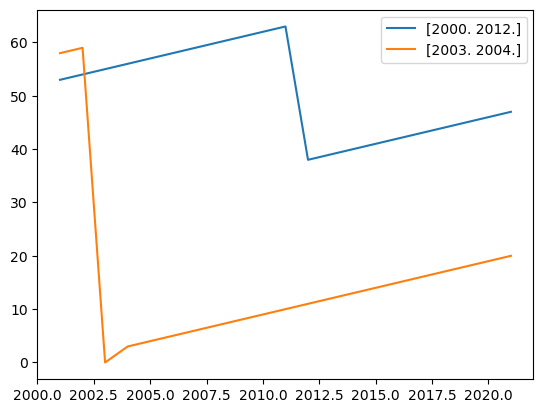

In [25]:
for i in range(len(data)):
    plt.plot(years[i],ages[i],label=fires[i])
    plt.legend()

For the volume of the forest, we are using a sigmoidal approximation. For that we need at least two points. The sigmoidal curve will not fit if we only have one point. Since we dont have any information about the fitting parameters for our approximation, we need to make some assumptions. We had already previsouly set a range for the coefficience based on some research. But we can get an approximation of the parameters a and b if we compute the sigmoidal curve for every pixel that has at least to sets of age vs. volume data points. For this we will use the ages approximates in our previous code for the volumes at 2001, 2011 and 2015

That way we can generate a list of fitting parameters, compute the average and use this result as our grounding parameters for the entire datasets. This assumption means that we area ssuming that Ontario forests on average grow at about the same rate, which may be an ovresimplification but at this level of analysis it is the best we can do

The following filters the data to any pixel that has atleast two volume datapoints, but no harvest and no fires (no disturbances)

In [36]:
data = ON_forest_and_fires[((~ON_forest_and_fires[['vol_2001','vol_2011']].isnull().any(axis=1)) | (~ON_forest_and_fires[['vol_2011','vol_2015']].isnull().any(axis=1))| (~ON_forest_and_fires[['vol_2001','vol_2015']].isnull().any(axis=1))) & (ON_forest_and_fires.year_harvested.isna() == True) & (ON_forest_and_fires.year.isna() == True)].head(2)
data.head()


,age_2001,age_2011,age_2019,year_harvested,vol_2001,vol_2011,vol_2015,lon,lat,geometry,year,month,day,area_intersect_perc,number_fires
5,105.0,106.0,NaN,NaN,29.69,42.61,NaN,-84.748042,46.964836,POLYGON ((-84.7461730219899 46.965757154155575...,NaN,NaN,NaN,NaN,NaN
6,76.0,86.0,NaN,NaN,120.89,134.68,NaN,-84.753428,46.969954,POLYGON ((-84.75155870050676 46.97087536086289...,NaN,NaN,NaN,NaN,NaN


Now, lets generate a function that return the coefficients for this data

In [ ]:
def return_coef_sig(data)
    """
    Funciton that takes in row of data from dataframe, and outpute the best fit for parameters a and b from sigmoidal expression defined in volume_age function
    :param data: row of data frame
    :return: parameters a, b
    """
    x = np.array(data[['age_2001','age_2011']])
    return a,b

In [ ]:
a,b=[],[]
for i in range(len(data)):
    results = return_coef_sig(data.iloc[i,:])
    a.append(results[0])
    b.append(results[1])

In [769]:
def vol_forest(data):
    """
    """
    
    m=1
    
    #Firts condition is if there are no fires and no harvest
    if (data.isna()['number_fires'] == True) & (data.isna()['year_harvested'] == True):
        set_years = np.array([2001,2011,2015])
        set_vol = np.array(data[['vol_2001','vol_2011','vol_2015']])
        popt, pcov=curve_fit(volume_age,set_years, set_vol, method='dogbox',nan_policy='omit')

        y_vol_fit = volume_age(x_vol_fit,popt[0],popt[1])
        
        b = np.nanmean(set_ages-set_years*m)
        years = np.arange(2001,2021,1)
        if (str(popt[0]) != 'nan') | (str(popt[1]) != 'nan'):
            ages = (years*m+b).astype('int')
            harvested = np.zeros(20).astype('int')
            fires = np.zeros(20).astype('int')
            dict_data = {'ages'}
            return ages, fires, harvested
        
    #next condition is if it was not harvested, but fires occured
    elif data.isna()['number_fires'] == False:
        if data.isna()['year_harvested'] == True:
            disturbance_years= np.array(data['year'],dtype='float')
            disturbance_factors = np.array(data['area_intersect_perc'],dtype='float')
            
            disturbance_years, inv = np.unique(disturbance_years, return_inverse=True)      
            temp_df = np.zeros(len(disturbance_years), dtype=disturbance_factors.dtype)
            np.add.at(temp_df, inv, disturbance_factors)  
            disturbance_factors=temp_df
            
        else:
            
            disturbance_years= np.append(np.array(data['year'],dtype='float'),data['year_harvested'])
            disturbance_factors = np.append(np.array(data['area_intersect_perc'],dtype='float'),1.0)
            
            disturbance_years, inv = np.unique(disturbance_years, return_inverse=True)      
            temp_df = np.zeros(len(disturbance_years), dtype=disturbance_factors.dtype)
            np.add.at(temp_df, inv, disturbance_factors)  
            disturbance_factors=temp_df
            
            print(disturbance_years)
            print(disturbance_factors)

        fire_prev = 0
        year = 2001
        print("Starting new pixel at age {}".format(year))
        j=0
        for fire,area,i in zip(disturbance_years,disturbance_factors,range(len(disturbance_years))):
            print("abcdefg:",len(disturbance_years))
            print("year is currently {}".format(year))
            fire = float(fire)
            area = float(area)
            
            if area > 1:
                area = 1.0
            print("area of fire is:",area)
            print("year of distrubance is {} with {}% reductions".format(fire,area*100))
            print("we are on the {}th fire on this pixel out of {}".format(i+1,len(disturbance_years)))
            
            
            if fire < 2001:
                print("Years are out of bounds")
                j=0
                continue
            elif (fire >= 2001) & (fire < 2011):
                if (i == 0) | (j==0):
                    set_years=np.array([2001])
                    set_ages=np.array(data['vol_2001'])
                    b = linear_reg_fixed_slope(set_years,set_ages,m)
                    years = np.arange(year,fire,1)
                    ages = (years*m+b).astype('int')
                    year = fire
                    year_age = int((fire*m+b)*(1-area))
                    #print(year_age)
                    fire_prev = fire
                    j=1
                    continue
                else:
                    set_years=np.array([year])
                    set_ages=np.array([year_age])
                    b = linear_reg_fixed_slope(set_years,set_ages,m)
                    temp_years = np.arange(year,fire,1)
                    years = np.append(years,temp_years)
                    ages = np.append(ages,(temp_years*m+b).astype('int'))
                    year = fire
                    year_age = int((fire*m+b)*(1-area))
                    #print(year_age)
                    fire_prev = fire
                    j=1
                    continue
            
            elif (fire >= 2011) & (fire < 2015):
                if (i == 0) | (j==0):
                    set_years=np.array([2001,2011])
                    set_ages=np.array(data[['col_2001','vol_2011']])
                    b = linear_reg_fixed_slope(set_years,set_ages,m)
                    years = np.arange(year,fire,1)
                    ages = (years*m+b).astype('int')
                    year = fire
                    year_age = int((fire*m+b)*(1-area))
                    #print(year_age)
                    fire_prev = fire
                    j=1
                    continue
                else:
                    set_years=np.array([year])
                    set_ages=np.array([year_age])
                    b = linear_reg_fixed_slope(set_years,set_ages,m)
                    temp_years = np.arange(year,fire,1)
                    years = np.append(years,temp_years)
                    ages = np.append(ages,(temp_years*m+b).astype('int'))
                    year = fire
                    year_age = int((fire*m+b)*(1-area))
                    #print(year_age)
                    fire_prev = fire
                    j=1
                    continue
                
            elif (fire >= 2015) & (fire <= 2021):
                if (i == 0) | (j==0):
                    set_years=np.array([2001,2011,2015])
                    set_ages=np.array(data[['vol_2001','vol_2011','vol_2015']])
                    b = linear_reg_fixed_slope(set_years,set_ages,m)
                    years = np.arange(year,fire,1)
                    ages = (years*m+b).astype('int')
                    year = fire
                    year_age = int((fire*m+b)*(1-area))
                    #print(year_age)
                    fire_prev = fire
                    j=1
                    continue
                else:
                    set_years=np.array([year])
                    set_ages=np.array([year_age])
                    b = linear_reg_fixed_slope(set_years,set_ages,m)
                    temp_years = np.arange(year,fire,1)
                    years = np.append(years,temp_years)
                    ages = np.append(ages,(temp_years*m+b).astype('int'))
                    year = fire
                    year_age = int((fire*m+b)*(1-area))
                    print(year_age)
                    fire_prev = fire
                    j=1
                    continue
                

        if year < 2011:
            set_years=np.array([year,2011,2015])
            set_ages=np.append(year_age,np.array(data[['vol_2011','vol_2015']]))
            b = linear_reg_fixed_slope(set_years,set_ages,m)
            temp_years = np.arange(year,2022,1)
            years = np.append(years,temp_years)
            ages = np.append(ages,(temp_years*m+b).astype('int'))
        elif (year >= 2011) & (year < 2015):

            set_years=np.array([year,2015])
            set_ages=np.append(year_age,np.array(data[['vol_2015']]))
            b = linear_reg_fixed_slope(set_years,set_ages,m)
            temp_years = np.arange(year,2022,1)
            years = np.append(years,temp_years)
            ages = np.append(ages,(temp_years*m+b).astype('int'))
        elif (year >= 2015) & (year <= 2021):

            set_years=np.array([year])
            set_ages=np.array(year_age)
            b = linear_reg_fixed_slope(set_years,set_ages,m)
            temp_years = np.arange(year,2022,1)
            years = np.append(years,temp_years)
            ages = np.append(ages,(temp_years*m+b).astype('int'))
    return ages,years,disturbance_years#harvest
            
    
    #last condition is if it was harvested, and fires occured
    #elif (data.isna()['number_fires'] == False) & (data.isna()['year_harvested'] == False):
    

In [770]:
ages,fires,harvested,years = [],[],[],[]
#data = ON_forest_and_fires[(ON_forest_and_fires.number_fires == 1) & (ON_forest_and_fires.year_harvested.isna() == False)].head(2)
data = ON_forest_and_fires.head(1)
print(data)
for i in range(len(data)):
    print("\n we are on data row",i)
    result = vol_forest(data.iloc[i,:])
    ages.append(result[0])
    years.append(result[1])
    fires.append(result[2])
#    #harvested.append(result[2])

   age_2001  age_2011  age_2019  year_harvested  vol_2001  vol_2011  vol_2015  \
0     104.0       NaN       NaN             NaN      8.55       NaN       NaN   

         lon        lat                                           geometry  \
0 -84.890501  46.906052  POLYGON ((-84.88863710751139 46.90697579711416...   

  year month  day area_intersect_perc  number_fires  
0  NaN   NaN  NaN                 NaN           NaN  

 we are on data row 0


C:\Users\Antoine Pepin\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


UnboundLocalError: cannot access local variable 'set_ages' where it is not associated with a value

In [461]:
ytemp=np.array(data[['age_2001','age_2011','age_2019']])[0]
ytemp

array([87., 86., nan])

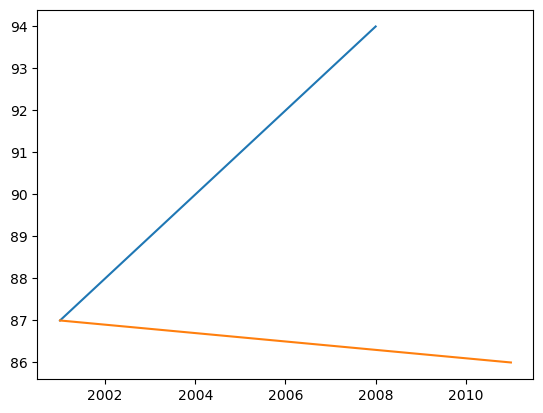

In [463]:
plt.plot(np.arange(2001,2009,1),ages[0])
plt.plot(np.array([2001,2011,2019]),ytemp)

In [319]:
np.zeros(10).astype('int')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [402]:
[fire[0] for fire in ON_forest_and_fires[ON_forest_and_fires.number_fires == 1].head(1)['year']]

[2010.0]

<Figure size 2000x2000 with 0 Axes>

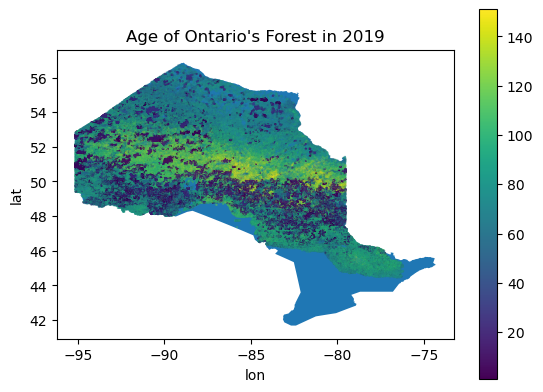

In [91]:
col = 'age_2019'
temp = ON_joined_gdf_red[['geometry',col]]
plt.figure(figsize=[20,20])

ax = ON_boundary.plot()
temp.plot(ax=ax,column = col,markersize=0.00001,legend=True)
plt.title("Age of Ontario's Forest in 2019")
plt.xlabel('lon')
plt.ylabel('lat')
plt.savefig(path+col+".png",dpi=2400)

plt.show()

<Figure size 2000x2000 with 0 Axes>

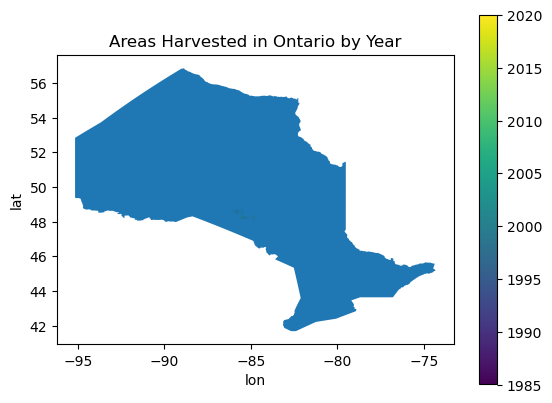

In [98]:
col = 'year_harvested'
temp = ON_joined_gdf_red[['geometry',col]]
plt.figure(figsize=[20,20])

ax = ON_boundary.plot()
temp.head(10000).plot(ax=ax,column = col,marker = '.',markersize=0.000001,legend=True)
plt.title("Areas Harvested in Ontario by Year")
plt.xlabel('lon')
plt.ylabel('lat')
plt.savefig(path+col+".png",dpi=4800)

plt.show()